<a href="https://colab.research.google.com/github/SnipeWipe/Marketing-Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
d=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
d.shape

(200, 5)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
d['Gender']=d['Gender'].map({'Female' : 0, 'Male' : 1})

In [ ]:
d.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X=d.iloc[:,[3,4]].values

In [ ]:
print(X)

[[  1  19  15  39]
 [  1  21  15  81]
 [  0  20  16   6]
 [  0  23  16  77]
 [  0  31  17  40]
 [  0  22  17  76]
 [  0  35  18   6]
 [  0  23  18  94]
 [  1  64  19   3]
 [  0  30  19  72]
 [  1  67  19  14]
 [  0  35  19  99]
 [  0  58  20  15]
 [  0  24  20  77]
 [  1  37  20  13]
 [  1  22  20  79]
 [  0  35  21  35]
 [  1  20  21  66]
 [  1  52  23  29]
 [  0  35  23  98]
 [  1  35  24  35]
 [  1  25  24  73]
 [  0  46  25   5]
 [  1  31  25  73]
 [  0  54  28  14]
 [  1  29  28  82]
 [  0  45  28  32]
 [  1  35  28  61]
 [  0  40  29  31]
 [  0  23  29  87]
 [  1  60  30   4]
 [  0  21  30  73]
 [  1  53  33   4]
 [  1  18  33  92]
 [  0  49  33  14]
 [  0  21  33  81]
 [  0  42  34  17]
 [  0  30  34  73]
 [  0  36  37  26]
 [  0  20  37  75]
 [  0  65  38  35]
 [  1  24  38  92]
 [  1  48  39  36]
 [  0  31  39  61]
 [  0  49  39  28]
 [  0  24  39  65]
 [  0  50  40  55]
 [  0  27  40  47]
 [  0  29  40  42]
 [  0  31  40  42]
 [  0  49  42  52]
 [  1  33  42  60]
 [  0  31  4

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

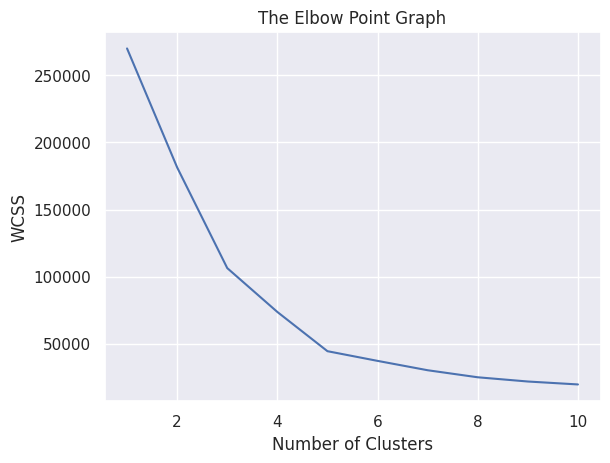

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Optimum No. of Clusters are 5.

Tranining the k-means clustering model

In [ ]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=0)

#return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 0 5 1 5 0 5 0 5 1 5 0 5 0 5 0 5 0 5 1 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing all the clusters

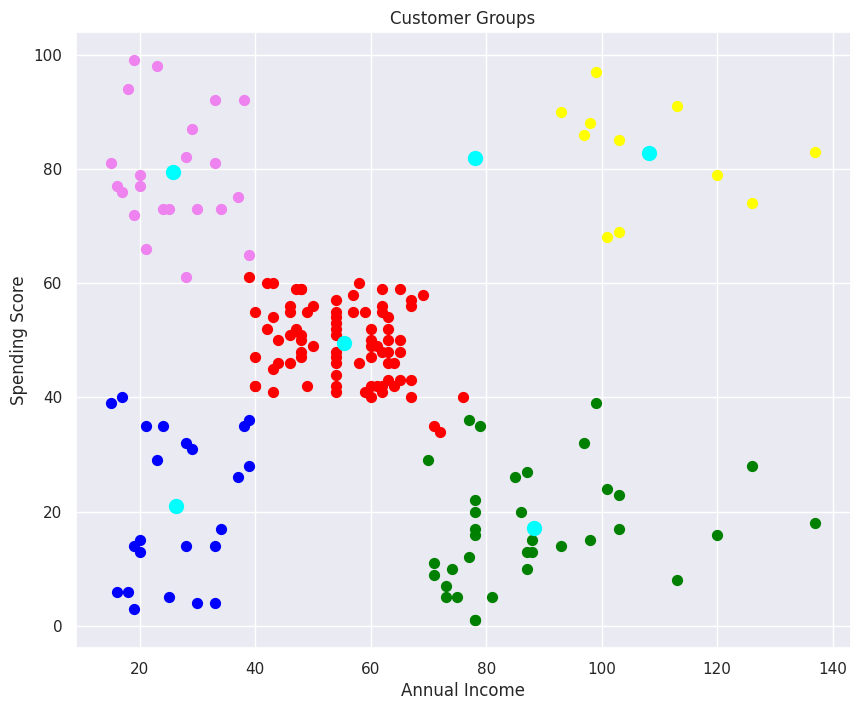

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(10,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()